# NECESSARY LIBRARIES


In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# DATA IMPORTING

In [2]:
df_cp = pd.read_csv('CarPrice_data.csv')

In [3]:
df_cp.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data Cleaning and Wrangling Process

In [4]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df_cp.shape

(205, 26)

In [6]:
df_cp.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
df_cp.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df_cp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [9]:
df_cp.duplicated().sum()

0

In [10]:
df_cp.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [11]:
df_cp.count()

car_ID              205
symboling           205
CarName             205
fueltype            205
aspiration          205
doornumber          205
carbody             205
drivewheel          205
enginelocation      205
wheelbase           205
carlength           205
carwidth            205
carheight           205
curbweight          205
enginetype          205
cylindernumber      205
enginesize          205
fuelsystem          205
boreratio           205
stroke              205
compressionratio    205
horsepower          205
peakrpm             205
citympg             205
highwaympg          205
price               205
dtype: int64

df_cp.CarName.unique()

In [12]:
# These are the categorical columns in our Dataset
df_cp.columns[df_cp.dtypes == 'object']

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

# Univariate Analysis 

In [13]:
print(df_cp['enginetype'].value_counts())

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


C:\Users\PETER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enginetype', ylabel='count'>

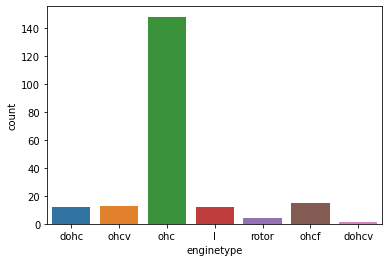

In [14]:
sns.countplot(df_cp['enginetype'])

In [15]:
print(df_cp['carbody'].value_counts())

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


C:\Users\PETER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carbody', ylabel='count'>

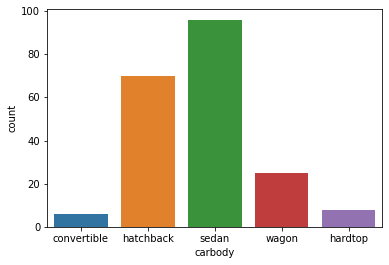

In [16]:
sns.countplot(df_cp['carbody'])

In [17]:
print(df_cp['fueltype'].value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64


C:\Users\PETER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fueltype', ylabel='count'>

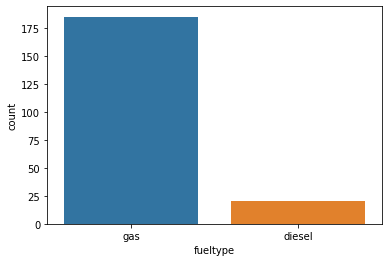

In [18]:
sns.countplot(df_cp['fueltype'])

In [19]:
print(df_cp['doornumber'].value_counts())

four    115
two      90
Name: doornumber, dtype: int64


C:\Users\PETER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='doornumber', ylabel='count'>

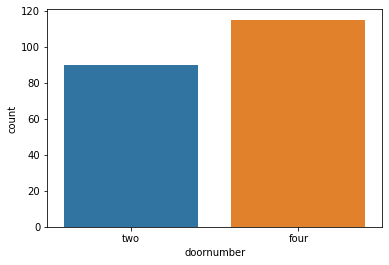

In [20]:
sns.countplot(df_cp['doornumber'])

In [21]:
print(df_cp['enginelocation'].value_counts())

front    202
rear       3
Name: enginelocation, dtype: int64


C:\Users\PETER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enginelocation', ylabel='count'>

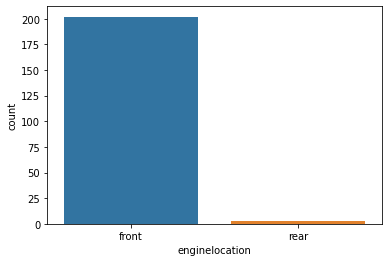

In [22]:
sns.countplot(df_cp['enginelocation'])

In [23]:
print(df_cp['drivewheel'].value_counts())

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


C:\Users\PETER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='drivewheel', ylabel='count'>

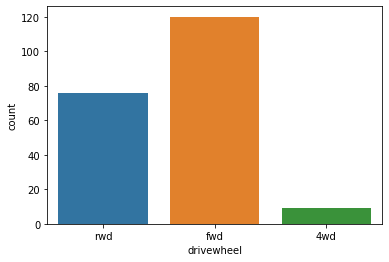

In [24]:
sns.countplot(df_cp['drivewheel'])

C:\Users\PETER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


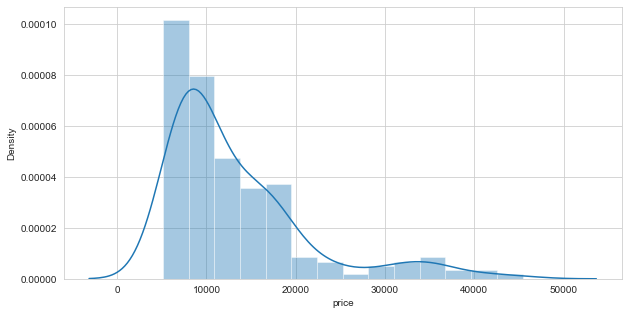

In [25]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.distplot(df_cp.price)
plt.show()

# Observations From the Univariate Analysis

1. std car aspirator, cars with four doors, sedan carbody, fwd drivewheel, front engine location, mpfi fuel system cars are prone to more sales and should be considered when manufacturing the cars.
2. From the negative skewedness of stroke feature, it shows that more losses will be made if the car price feature is depended on the stroke
3. From the positive skewedness of wheelbase, curbweight,engine size and horsepower feature, it shows that the investors have the tendency of making more profit and less losses if the car prices are depended on these features.
4. Gas is the most used fuel type, so the investors might want to consider assembling more gas cars.

<AxesSubplot:xlabel='curbweight', ylabel='Count'>

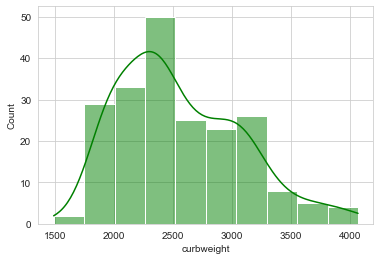

In [26]:
sns.histplot(x= "curbweight",color= "green",edgecolor= "white", data=df_cp, kde=True)

<AxesSubplot:xlabel='curbweight'>

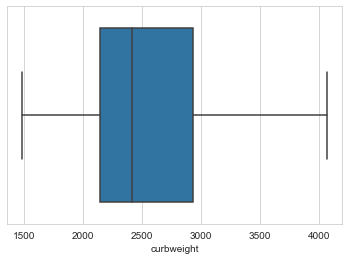

In [27]:
sns.boxplot(x="curbweight",data= df_cp)
#From the boxplot we can see that there are no outliers, the left and right whiskers are not equal, so this shows that the feature is 
#skewed.

<AxesSubplot:xlabel='wheelbase', ylabel='Count'>

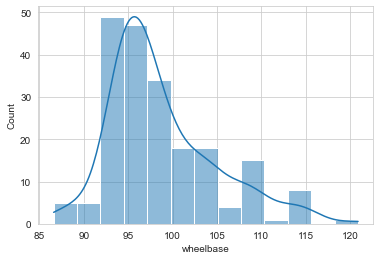

In [28]:
sns.histplot(x= "wheelbase", data=df_cp, kde=True)
#From this feature we can see that it is positively skewed which shows the presence of an outlier.

<AxesSubplot:xlabel='wheelbase'>

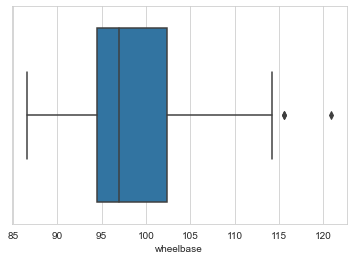

In [29]:
sns.boxplot(x="wheelbase",data= df_cp)
#the boxplot confirms there is an outlier in the wheel base feature

<AxesSubplot:xlabel='enginesize', ylabel='Count'>

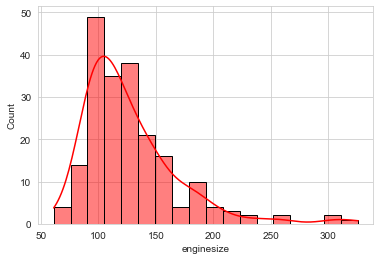

In [30]:
sns.histplot(x= "enginesize",color= "red",edgecolor= "black", data=df_cp, kde=True)
#This is positively skewed, which indicate the presence of an outlier.

<AxesSubplot:xlabel='enginesize'>

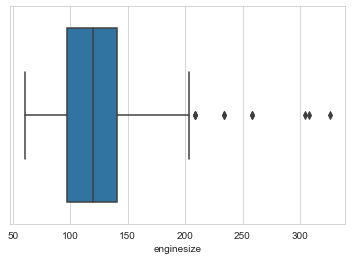

In [31]:
sns.boxplot(x="enginesize",data= df_cp)
#boxplot shading more light on the above point

<AxesSubplot:xlabel='horsepower', ylabel='Count'>

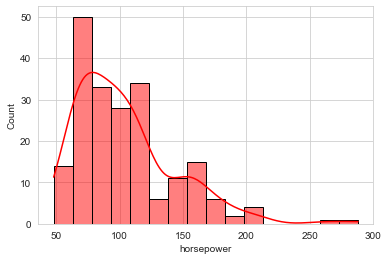

In [32]:
sns.histplot(x= "horsepower",color= "red",edgecolor= "black", data=df_cp, kde=True)
# this is a Positively skewed horsepower feature showing the presence of and outlier

<AxesSubplot:xlabel='horsepower'>

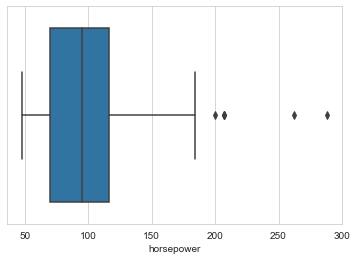

In [33]:
sns.boxplot(x="horsepower",data= df_cp)
#Outliers showing with the boxplot

<AxesSubplot:xlabel='stroke', ylabel='Count'>

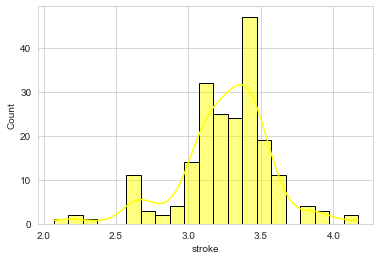

In [34]:
sns.histplot(x= "stroke",color= "yellow",edgecolor= "black", data=df_cp,kde=True)
#Negatively skewed, this shows the presence of an outlier.

<AxesSubplot:xlabel='stroke'>

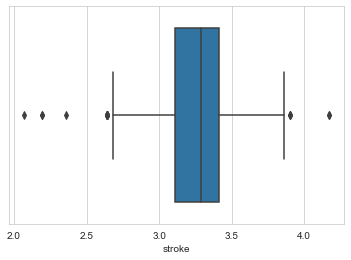

In [35]:
sns.boxplot(x="stroke",data= df_cp)
#this boxplot outline the presence of outliers on the left and right side of the feature, which shows the presence of outliers to be more  
#on the left than the right part.

# Bivaraite Analysis and visuallazation of some data

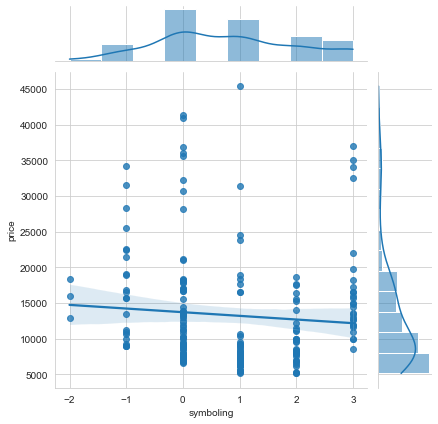

In [36]:
sns.jointplot(x='symboling', y='price', data=df_cp, kind='reg')

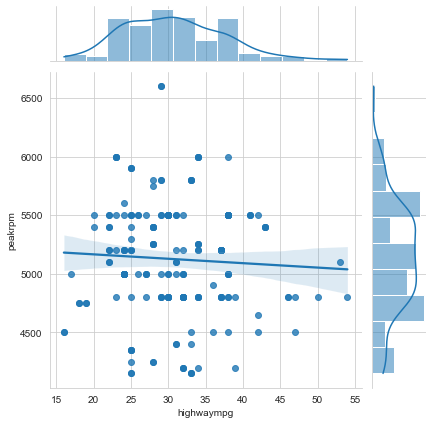

In [37]:
sns.jointplot(x='highwaympg', y='peakrpm', data=df_cp, kind='reg')

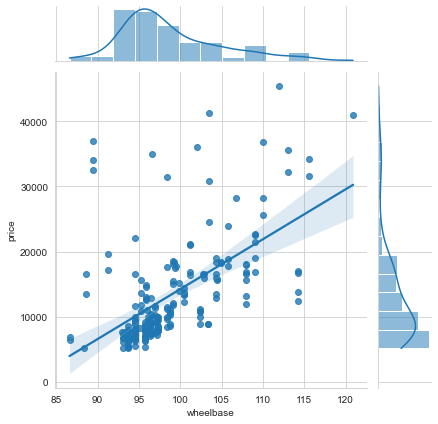

In [38]:
sns.jointplot(x='wheelbase', y='price', data=df_cp, kind='reg')

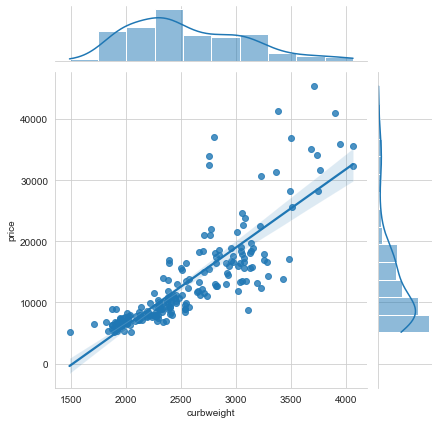

In [39]:
sns.jointplot(x='curbweight', y='price', data=df_cp, kind='reg')

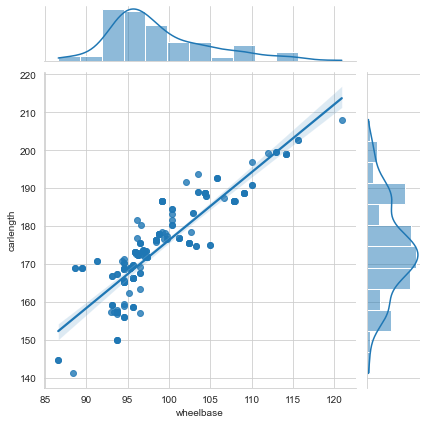

In [40]:
sns.jointplot(x='wheelbase', y='carlength', data=df_cp, kind='reg')

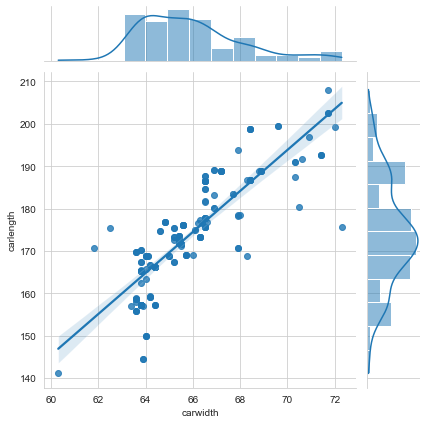

In [41]:
sns.jointplot(x='carwidth', y='carlength', data=df_cp, kind='reg')

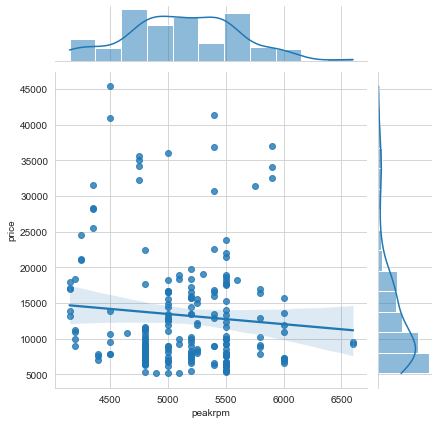

In [42]:
sns.jointplot(x='peakrpm', y='price', data=df_cp, kind='reg')

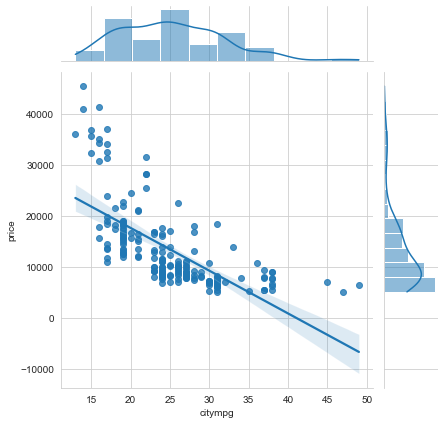

In [43]:
sns.jointplot(x='citympg',y='price',data=df_cp,kind='reg')

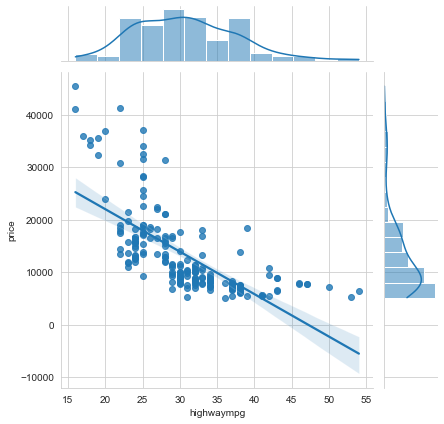

In [44]:
sns.jointplot(x='highwaympg',y='price',data=df_cp,kind='reg')

# Observations From Bivariate Analysis 

1. A negative correlation is observed between price and highwaympg, price and peakrpm and
these implies that this feature are not importance for predicting the prices of cars as they are inversely
proportional to each other.
2. A strong positive correlation is observed between wheelbase and carlength, carlength and carwidth, 
which shows that the features are directly proportional to each other.
3. A near perfect positively correlation is observed between highwaympg and citympg.

# Multivariate Analysis

In [45]:
df_cp.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


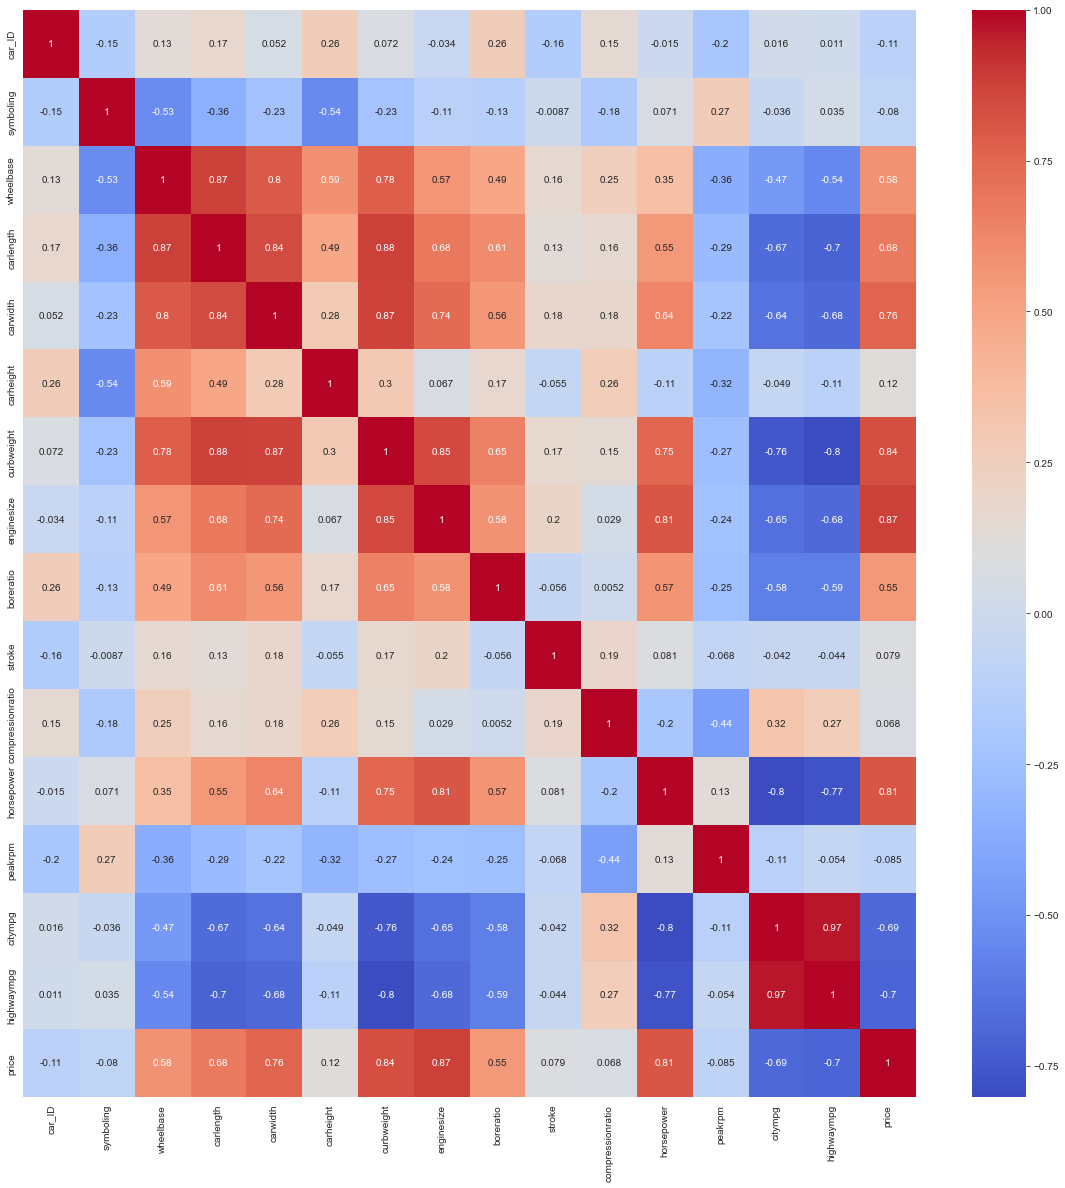

In [46]:
plt.figure(figsize=(20,20))
correlations = df_cp.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

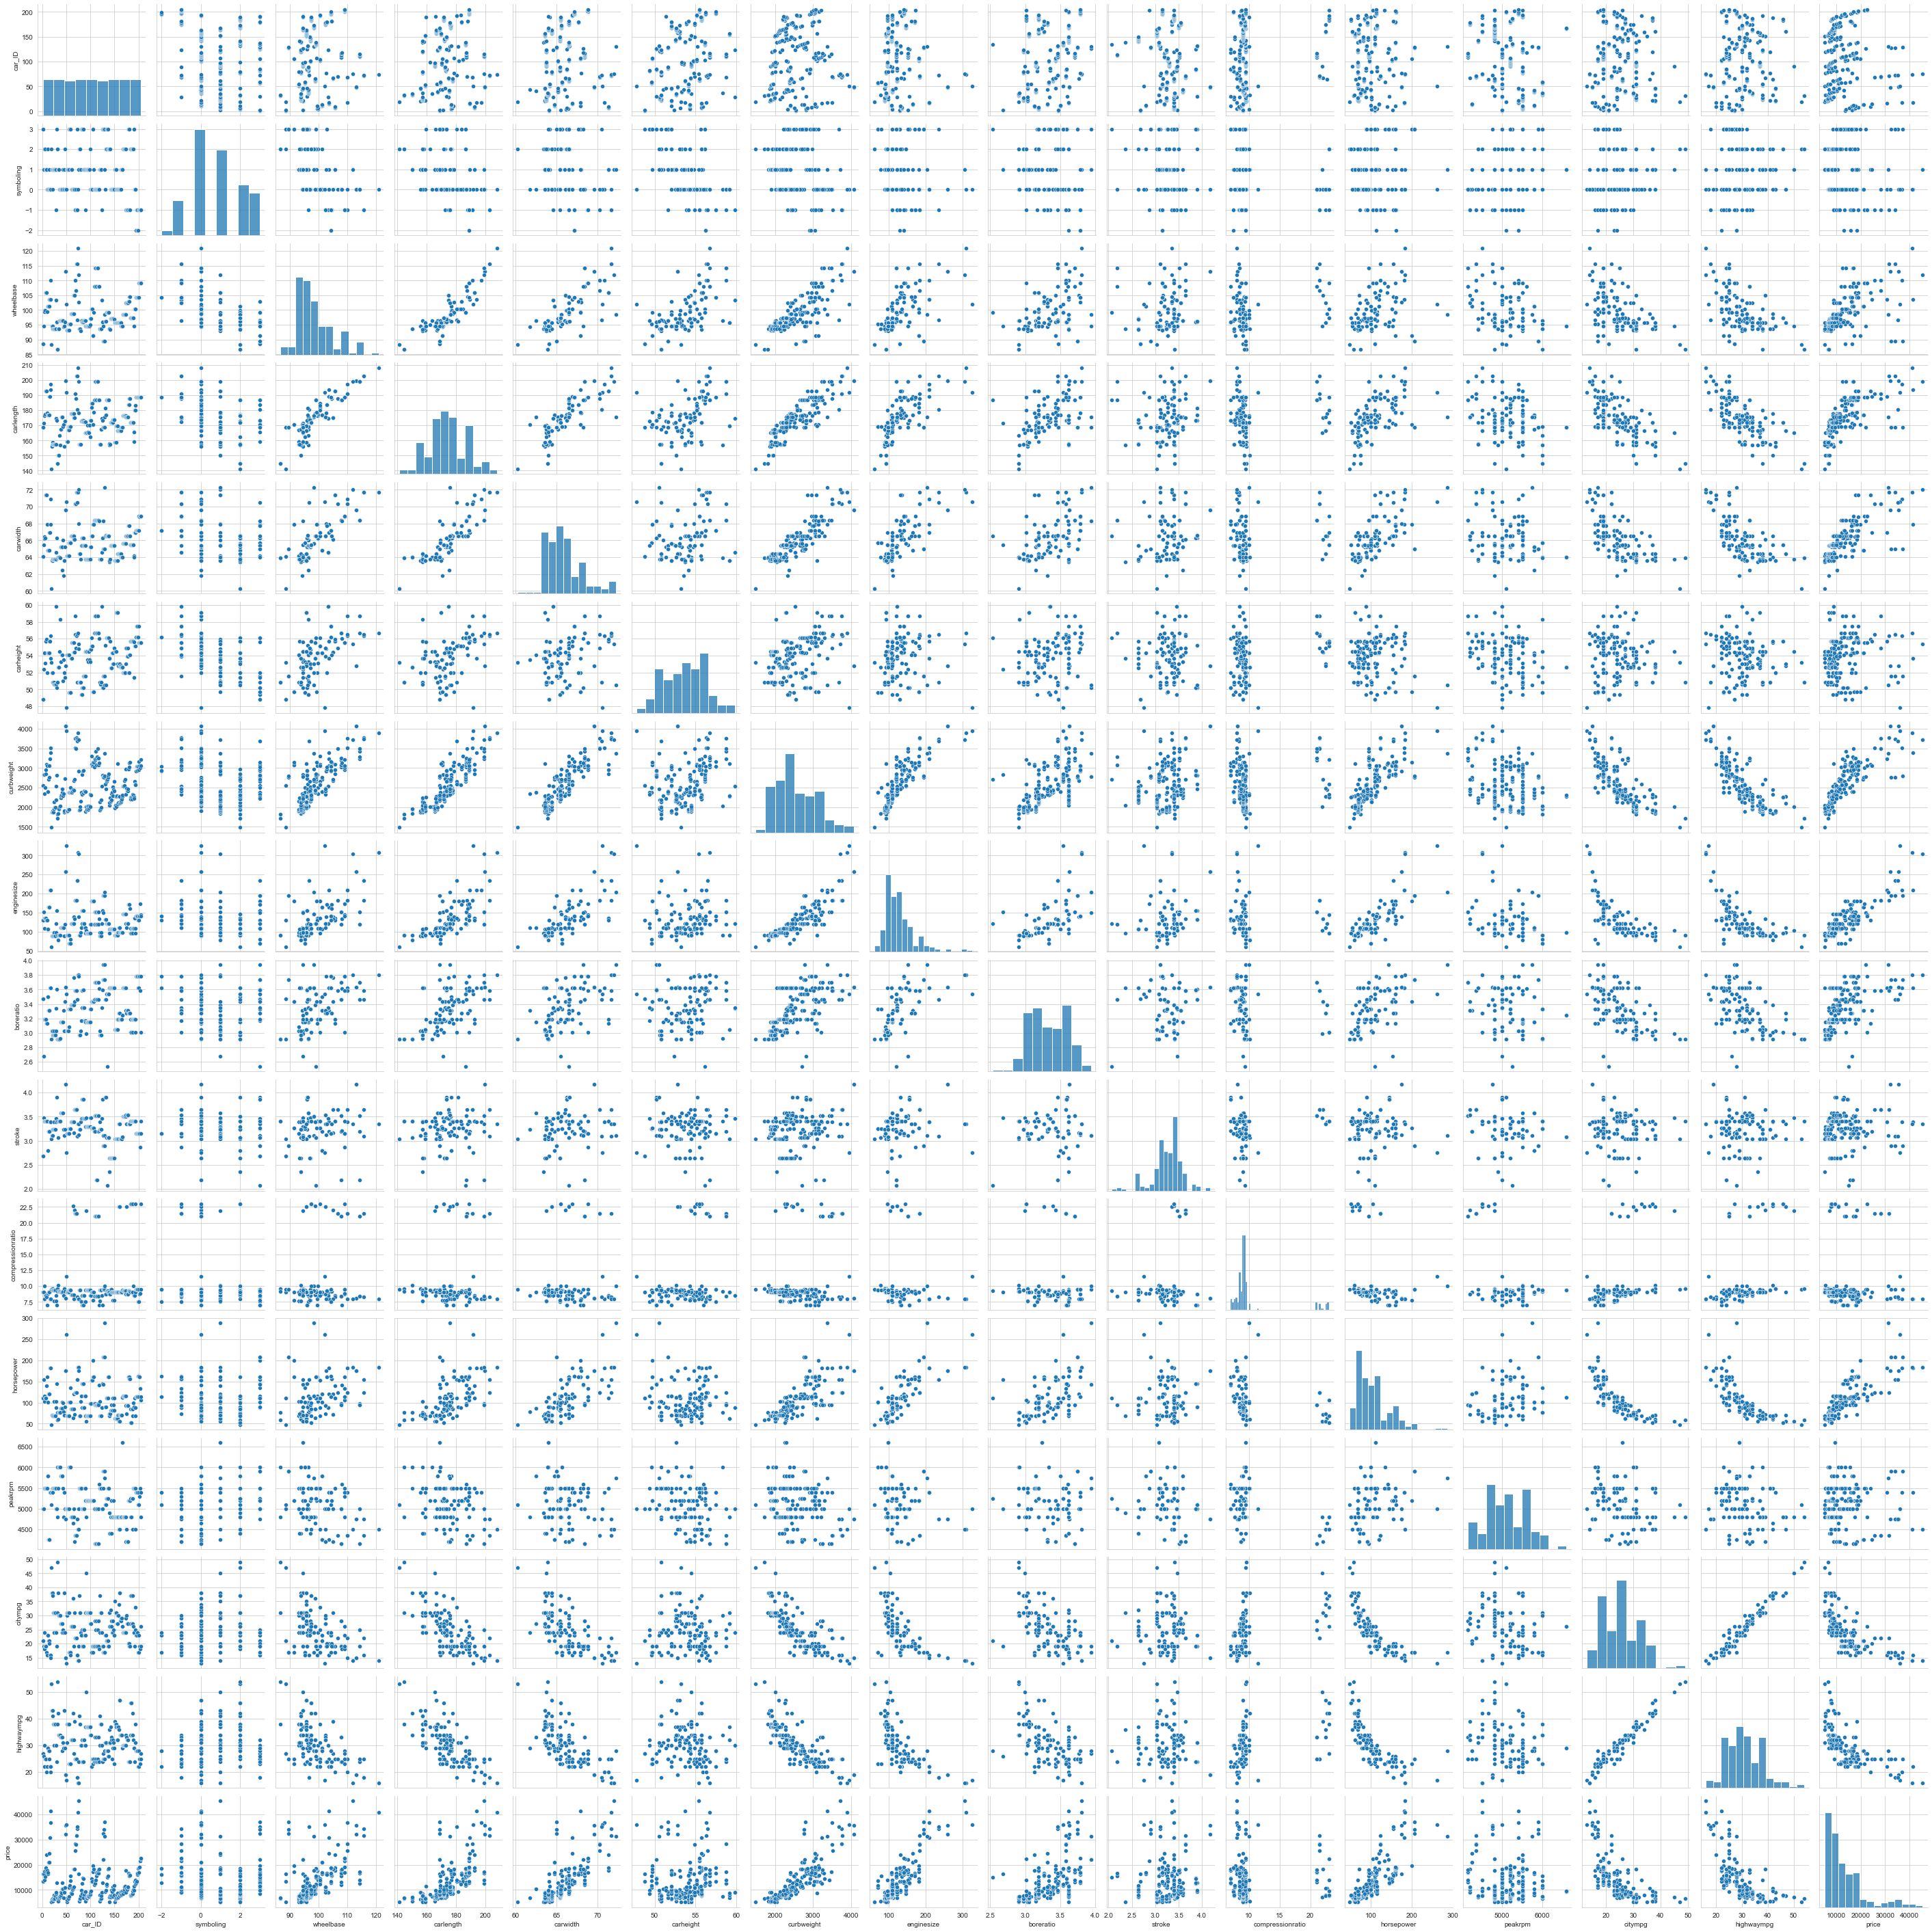

In [47]:
sns.pairplot(df_cp)

# Multivariate Analysis Observation

The multivariate analysis shows the correlation level between all the vaiables and also, it gives the distribution shape of each vairable in the pair plot.

# FEATURE ENGINEERING

In [48]:
#we fisrt make a copy of the data set to ensure that the changes made do not affect the original dataframe
new_copy=df_cp.copy()
new_copy


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [49]:
# Engineering the car name feature
new_copy['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [50]:
#Now We create a new column "car_company" in our dataset :
new_copy['car_company'] = new_copy['CarName'].apply(lambda x:x.split(' ')[0])
new_copy['car_company'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: car_company, dtype: object

In [51]:
new_copy = new_copy.drop(['CarName'], axis =1)

In [52]:
new_copy['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_company, dtype: int64

Merging the dataset 

In [53]:
new_copy['car_company'].replace('porcshce', 'porsche',inplace=True)
new_copy['car_company'].replace('vokswagen', 'volkswagen',inplace=True)
new_copy['car_company'].replace('vw', 'volkswagen',inplace=True)
new_copy['car_company'].replace('Nissan', 'nissan',inplace=True)
new_copy['car_company'].replace('toyouta', 'toyota',inplace=True)
new_copy['car_company'].replace('maxda', 'mazda',inplace=True)

# Encoding categorical variables

In [54]:
## In cleaning the dataset, we have to convert text data to numerical because computers understand only numbers
label_encoder = preprocessing.LabelEncoder()

# Ten columns have categorical text info, and we convert them to numbers
df_cp['CarName'] = label_encoder.fit_transform(df_cp['CarName'])
df_cp['fueltype'] = label_encoder.fit_transform(df_cp['fueltype'])
df_cp['aspiration'] = label_encoder.fit_transform(df_cp['aspiration'])
df_cp['doornumber'] = label_encoder.fit_transform(df_cp['doornumber'])
df_cp['carbody'] = label_encoder.fit_transform(df_cp['carbody'])
df_cp['drivewheel'] = label_encoder.fit_transform(df_cp['drivewheel'])
df_cp['enginelocation'] = label_encoder.fit_transform(df_cp['enginelocation'])
df_cp['enginetype'] = label_encoder.fit_transform(df_cp['enginetype'])
df_cp['cylindernumber'] = label_encoder.fit_transform(df_cp['cylindernumber'])
df_cp['fuelsystem'] = label_encoder.fit_transform(df_cp['fuelsystem'])

In [55]:
df_cp.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [56]:
#Next we name the target variable and drop it from the dataframe
encoded_copy= pd.get_dummies(new_copy)
encoded_copy

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,0,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,0,0,1
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,0,0,0,1
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,0,0,0,0,0,1
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,0,0,0,0,1


# SCALING DATA

In [57]:
#to split our data into test and train we import the library below
from sklearn.model_selection import train_test_split

In [58]:
x = df_cp.drop(['CarName', 'price'], axis=1)
y = df_cp['price']

In [59]:
print(y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


In [60]:
print(x)

     car_ID  symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0         1          3         1           0           1        0           2   
1         2          3         1           0           1        0           2   
2         3          1         1           0           1        2           2   
3         4          2         1           0           0        3           1   
4         5          2         1           0           0        3           0   
..      ...        ...       ...         ...         ...      ...         ...   
200     201         -1         1           0           0        3           2   
201     202         -1         1           1           0        3           2   
202     203         -1         1           0           0        3           2   
203     204         -1         0           1           0        3           2   
204     205         -1         1           1           0        3           2   

     enginelocation  wheelb

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-1.72362229,  1.74347043,  0.32879797, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [-1.70672403,  1.74347043,  0.32879797, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [-1.68982577,  0.133509  ,  0.32879797, ..., -0.26296022,
        -0.95301169, -0.69162706],
       ...,
       [ 1.68982577, -1.47645244,  0.32879797, ...,  0.78785546,
        -1.10624102, -1.12833203],
       [ 1.70672403, -1.47645244, -3.04138127, ..., -0.68328649,
         0.11959362, -0.54605874],
       [ 1.72362229, -1.47645244,  0.32879797, ...,  0.57769233,
        -0.95301169, -0.83719538]])

# Spliting the Train and Test data

In [62]:
#we split the data set here into test and train where 30% is assigned to the test value
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
# Loading the Linear Regression model
lin_reg_model = LinearRegression()

In [65]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [66]:
# Prediction on Train data
train_data_prediction = lin_reg_model.predict(x_train)

In [67]:
print(lin_reg_model.intercept_)
print(lin_reg_model.coef_)

13027.082327211067
[ -944.44938851   402.93303418  2009.41522716   344.77329897
  -894.94065958  -983.96311826   787.05591631  1506.08088648
  1538.98393347  -806.55146436  1196.97468252   130.66522536
  2054.87679402   174.04165484  -229.54600006  2916.59227503
  -139.66648537  -811.3072389   -999.56289595  2472.47882053
   699.92054736   607.45067323 -1455.16148816   814.80159455]


In [68]:
# R squared Error
error_score = metrics.r2_score(y_train, train_data_prediction)
print('R squared Error :', error_score)

R squared Error : 0.9128590262398171


In [69]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [70]:
print('MAE: ', (metrics.mean_absolute_error(train_data_prediction, y_train)))
print('MSE: ', (metrics.mean_squared_error(train_data_prediction, y_train)))

MAE:  1793.547761120616
MSE:  5438738.092480078


In [71]:
#checking the shape of the dataframe after split
x_train.shape, y_train.shape

((143, 24), (143,))

In [72]:
x_test.shape, y_test.shape

((62, 24), (62,))

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
model= LinearRegression()

In [75]:
#now fitting the model ontop of the dataset
model.fit(x_train,y_train)

LinearRegression()

In [76]:
#To check predictions
predictions = model.predict(x_test)

In [77]:
predictions

array([ 6407.6764681 , 17329.53147787, 14456.82537683,  -439.13407383,
        9782.23352729, 13474.21278574,  6507.74900693,  4182.8677954 ,
       20389.61933552,  8368.43894489, 16054.33843021, 29633.58278386,
       10832.46661048, 14760.02391202,  6996.61357486, 11835.60967538,
        7855.14163152, 20044.0918796 ,  9778.02808182,  7460.19520292,
       10638.01822994, 20804.2629794 ,  8622.10922658, 12448.54869724,
       19901.52346718,  6754.2223053 ,  6301.11500263, 21269.47414865,
        7611.08976534,  4373.4147767 ,  6503.62280659,  9011.51025862,
       17546.04817833,  7779.49050053,  6322.73047081, 23737.30520104,
        9889.29328821, 14892.45522425,  7385.03843452, 37042.21239446,
        5395.11869243, 15819.15871411, 33326.07906581, 19094.75195223,
        9089.76071028,  7596.7803593 ,  8412.69839102, 13635.5657488 ,
        7844.62224588,  8520.19364207, 22695.21474326,  3740.40566178,
        5634.40023825, 10173.68204974, 18984.82404819, 21490.78389684,
      

# Visualazation of actaul price and predicted price

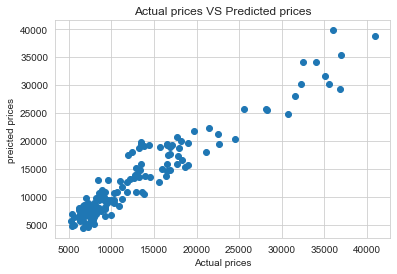

In [78]:
plt.scatter(y_train, train_data_prediction)
plt.xlabel('Actual prices')
plt.ylabel('preicted prices')
plt.title('Actual prices VS Predicted prices')
plt.show()

In [79]:
Result=pd.DataFrame({"Predicted_Price":y_train,"Actual_Price":train_data_prediction})
Result.head(15)

,Predicted_Price,Actual_Price
40,10295.0,8938.291073
60,8495.0,10715.852247
56,11845.0,10816.507061
101,13499.0,19861.011720
86,8189.0,9877.861711
19,6295.0,6942.278428
155,8778.0,7410.979771
97,7999.0,5111.696803
54,7395.0,6554.194707
184,7995.0,8343.075770


In [80]:
# Prediction on the test data
test_data_prediction = lin_reg_model.predict(x_test)

In [81]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print('R squared Error :', error_score)

R squared Error : 0.8179017654178393


In [82]:
print('MAE: ', (metrics.mean_absolute_error(test_data_prediction, y_test)))
print('MSE: ', (metrics.mean_squared_error(test_data_prediction, y_test)))

MAE:  2366.972166056516
MSE:  12025288.582615016


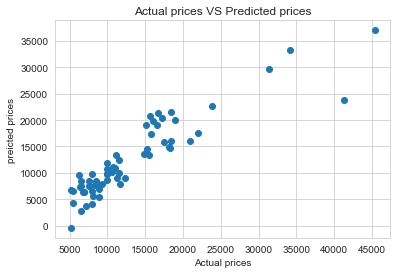

In [83]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual prices')
plt.ylabel('preicted prices')
plt.title('Actual prices VS Predicted prices')
plt.show()

In [84]:
Result=pd.DataFrame({"Predicted_price":y_test,"Actual_Price":test_data_prediction})
Result.head(15)

,Predicted_price,Actual_Price
52,6795.0,6407.676468
181,15750.0,17329.531478
5,15250.0,14456.825377
18,5151.0,-439.134074
188,9995.0,9782.233527
170,11199.0,13474.212786
76,5389.0,6507.749007
154,7898.0,4182.867795
104,17199.0,20389.619336
33,6529.0,8368.438945
